In [0]:
import tensorflow as tf

In [0]:
def Conv2D_Block(input_tensor , n_filters):
  x = tf.keras.layers.Conv2D(filters = n_filters , kernel_size = (3 , 3) , kernel_initializer = 'he_normal' , padding = 'same')(input_tensor)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  
  x = tf.keras.layers.Conv2D(filters = n_filters , kernel_size = (3 , 3) , kernel_initializer = 'he_normal' , padding = 'same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  
  return x

In [0]:
def U_Net(img_tensor , n_filters = 16):
  conv1 = Conv2D_Block(img_tensor , n_filters * 1)
  pool1 = tf.keras.layers.MaxPooling2D((2 , 2))(conv1)
  pool1 = tf.keras.layers.Dropout(0.05)(pool1)
  
  conv2 = Conv2D_Block(pool1 , n_filters * 2)
  pool2 = tf.keras.layers.MaxPooling2D((2 , 2))(conv2)
  pool2 = tf.keras.layers.Dropout(0.05)(pool2)
  
  conv3 = Conv2D_Block(pool2 , n_filters * 4)
  pool3 = tf.keras.layers.MaxPooling2D((2 , 2))(conv3)
  pool3 = tf.keras.layers.Dropout(0.05)(pool3)
  
  conv4 = Conv2D_Block(pool3 , n_filters * 8)
  pool4 = tf.keras.layers.MaxPooling2D((2 , 2))(conv4)
  pool4 = tf.keras.layers.Dropout(0.05)(pool4)
  
  conv5 = Conv2D_Block(pool4 , n_filters * 16)
  
  pool6 = tf.keras.layers.Conv2DTranspose(n_filters * 8 , (3 , 3) , (2, 2) , padding = 'same')(conv5)
  pool6 = tf.keras.layers.concatenate([pool6 , conv4])
  pool6 = tf.keras.layers.Dropout(0.05)(pool6)
  conv6 = Conv2D_Block(pool6 , n_filters * 8)
  
  pool7 = tf.keras.layers.Conv2DTranspose(n_filters * 4 , (3 , 3) , (2 , 2) , padding = 'same')(conv6)
  pool7 = tf.keras.layers.concatenate([pool7 , conv3])
  pool7 = tf.keras.layers.Dropout(0.05)(pool7)
  conv7 = Conv2D_Block(pool7 , n_filters * 4)
  
  pool8 = tf.keras.layers.Conv2DTranspose(n_filters * 2 , (3 , 3) , (2 , 2) , padding = 'same')(conv7)
  pool8 = tf.keras.layers.concatenate([pool8 , conv2])
  pool8 = tf.keras.layers.Dropout(0.05)(pool8)
  conv8 = Conv2D_Block(pool8 , n_filters * 2)
  
  pool9 = tf.keras.layers.Conv2DTranspose(n_filters * 1 , (3 , 3) , (2 , 2) , padding = 'same')(conv8)
  pool9 = tf.keras.layers.concatenate([pool9 , conv1])
  pool9 = tf.keras.layers.Dropout(0.05)(pool9)
  conv9 = Conv2D_Block(pool9 , n_filters * 1)
  
  output = tf.keras.layers.Conv2D(1 , (1 , 1) , activation = 'sigmoid')(conv9)
  
  u_net = tf.keras.Model(inputs = [img_tensor] , outputs = [output])
  
  return u_net

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ajaxlegrand","key":"baf5b2d32fc89c872a17f185d4649596"}'}

In [0]:
!mkdir ~/.kaggle

In [0]:
!pip install -q kaggle

In [0]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle competitions download -c ultrasound-nerve-segmentation

  0% 0.00/749k [00:00<?, ?B/s]
100% 749k/749k [00:00<00:00, 51.0MB/s]
  0% 0.00/6.40k [00:00<?, ?B/s]
100% 6.40k/6.40k [00:00<00:00, 7.22MB/s]
 99% 1.03G/1.04G [00:24<00:00, 26.3MB/s]
100% 1.04G/1.04G [00:25<00:00, 44.5MB/s]
 99% 1.06G/1.07G [00:17<00:00, 60.8MB/s]
100% 1.07G/1.07G [00:17<00:00, 65.8MB/s]


In [11]:
!unzip sample_submission.csv.zip

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   


In [12]:
!unzip test.zip
!unzip train.zip
!unzip train_masks.csv.zip

Archive:  test.zip
   creating: test/
  inflating: test/1.tif              
  inflating: test/10.tif             
  inflating: test/100.tif            
  inflating: test/1000.tif           
  inflating: test/1001.tif           
  inflating: test/1002.tif           
  inflating: test/1003.tif           
  inflating: test/1004.tif           
  inflating: test/1005.tif           
  inflating: test/1006.tif           
  inflating: test/1007.tif           
  inflating: test/1008.tif           
  inflating: test/1009.tif           
  inflating: test/101.tif            
  inflating: test/1010.tif           
  inflating: test/1011.tif           
  inflating: test/1012.tif           
  inflating: test/1013.tif           
  inflating: test/1014.tif           
  inflating: test/1015.tif           
  inflating: test/1016.tif           
  inflating: test/1017.tif           
  inflating: test/1018.tif           
  inflating: test/1019.tif           
  inflating: test/102.tif            
  inflating:

In [0]:
import pandas as pd


In [0]:
d = pd.read_csv('train_masks.csv')

In [16]:
d.head()

,subject,img,pixels
0,1,1,168153 9 168570 15 168984 22 169401 26 169818 ...
1,1,2,96346 7 96762 16 97179 27 97595 35 98012 40 98...
2,1,3,121957 2 122365 26 122784 28 123202 31 123618 ...
3,1,4,110980 9 111393 21 111810 33 112228 43 112647 ...
4,1,5,NaN


In [0]:
import os
import re

In [31]:
train_path = os.listdir('/content/train/')
test_path = os.listdir('/content/test/')

print(len(train_path) , len(test_path))

11270 5508


In [35]:
reg = re.compile("[0-9]+")

temp1 = list(map(lambda x: reg.match(x).group(), train_path)) 
temp1 = list(map(int, temp1))

temp2 = list(map(lambda x: reg.match(x.split("_")[1]).group(), train_path))
temp2 = list(map(int, temp2))

train_path = [x for _,_,x in sorted(zip(temp1, temp2, train_path))]
train_path[:20]

['1_1.tif',
 '1_1_mask.tif',
 '1_2.tif',
 '1_2_mask.tif',
 '1_3.tif',
 '1_3_mask.tif',
 '1_4.tif',
 '1_4_mask.tif',
 '1_5.tif',
 '1_5_mask.tif',
 '1_6.tif',
 '1_6_mask.tif',
 '1_7.tif',
 '1_7_mask.tif',
 '1_8.tif',
 '1_8_mask.tif',
 '1_9.tif',
 '1_9_mask.tif',
 '1_10.tif',
 '1_10_mask.tif']

In [36]:
len(train_path)

11270

In [0]:
train_image = []
train_mask = []

for index , item in enumerate(train_path):
  if index % 2 == 0:
    train_image.append(item)
  else:
    train_mask.append(item)

In [41]:
print(len(train_image))
print(len(train_mask))

5635
5635


In [0]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np
import skimage


/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


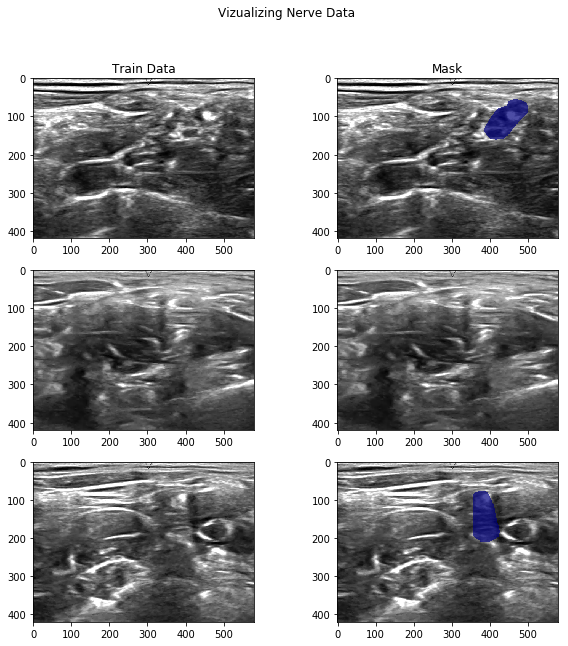

In [67]:
fig , ax = plt.subplots(3 , 2 , figsize=[10 , 10])
fig.suptitle('Vizualizing Nerve Data')
ax[0 , 0].set_title('Train Data')
ax[0 , 1].set_title('Mask')

# print(ax.shape)
for i in range(0 , 3):
  ind = random.randint(0 , len(train_image))
  img1 = np.array(Image.open("/content/train/" + str(train_image[ind])))
  ax[i , 0].imshow(img1 , cmap = 'gray')

  img2 = np.array(Image.open("/content/train/" + str(train_mask[ind])))
  img2 = np.ma.masked_where(img2 == 0, img2)
  ax[i , 1].imshow(img1 , cmap = 'gray' , interpolation = 'none')
  ax[i , 1].imshow(img2 , cmap = 'jet', interpolation = 'none', alpha = 0.7)
    
plt.show()

In [0]:
X = np.zeros((len(train_image), 128, 128, 1), dtype=np.float32)
y = np.zeros((len(train_image), 128, 128, 1), dtype=np.float32)

In [76]:
for n , img_name in enumerate(train_image):
  img = tf.keras.preprocessing.image.load_img('/content/train/'+img_name , grayscale=True)
  in_img = tf.keras.preprocessing.image.img_to_array(img)
  in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
  X[n] = in_img / 255.0
  
for n , img_name in enumerate(train_mask):
  img = tf.keras.preprocessing.image.load_img('/content/train/'+img_name , grayscale=True)
  in_img = tf.keras.preprocessing.image.img_to_array(img)
  in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
  y[n] = in_img / 255.0

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [0]:
from sklearn.model_selection import train_test_split
X_train , X_valid , y_train , y_valid = train_test_split(X , y , test_size = 0.1 , random_state = 42)

In [94]:
img_tensor = tf.keras.layers.Input((128 , 128 , 1) , name = 'img')
model = U_Net(img_tensor)
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

W0614 17:19:48.266108 140477369186176 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0614 17:19:49.240010 140477369186176 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [95]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 16) 160         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 128, 128, 16) 64          conv2d_2[0][0]                   
__________________________________________________________________________________________________
activation_2 (Activation)       (None, 128, 128, 16) 0           batch_normalization_2[0][0]      
______________________________________________________________________________________________

In [0]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    tf.keras.callbacks.ModelCheckpoint('model_nerve.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [98]:
results = model.fit(X_train, y_train, batch_size=32, epochs=50, callbacks=callbacks,\
                    validation_data=(X_valid, y_valid))

Train on 5071 samples, validate on 564 samples
Epoch 1/50
5056/5071 [============================>.] - ETA: 0s - loss: 0.1248 - acc: 0.9815
Epoch 00001: val_loss improved from inf to 0.18365, saving model to model_nerve.h5
5071/5071 [==============================] - 26s 5ms/sample - loss: 0.1246 - acc: 0.9815 - val_loss: 0.1836 - val_acc: 0.9363
Epoch 2/50
5056/5071 [============================>.] - ETA: 0s - loss: 0.0444 - acc: 0.9851
Epoch 00002: val_loss improved from 0.18365 to 0.04330, saving model to model_nerve.h5
5071/5071 [==============================] - 18s 3ms/sample - loss: 0.0444 - acc: 0.9851 - val_loss: 0.0433 - val_acc: 0.9846
Epoch 3/50
5056/5071 [============================>.] - ETA: 0s - loss: 0.0315 - acc: 0.9856
Epoch 00003: val_loss did not improve from 0.04330
5071/5071 [==============================] - 18s 4ms/sample - loss: 0.0315 - acc: 0.9856 - val_loss: 0.0491 - val_acc: 0.9759
Epoch 4/50
5056/5071 [============================>.] - ETA: 0s - loss: 0.0

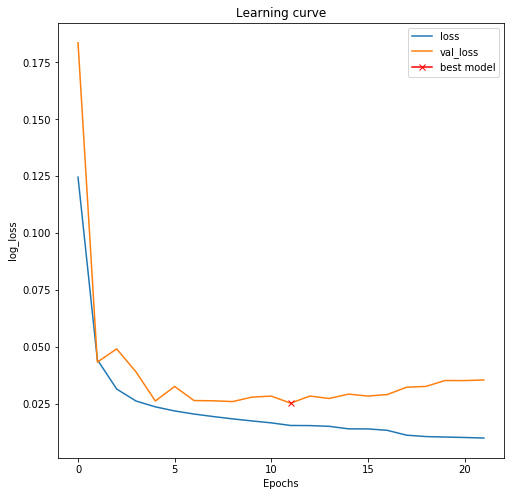

In [99]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [0]:
model.load_weights('model_nerve.h5')

In [103]:
model.evaluate(X_valid, y_valid, verbose=1)


564/564 [==============================] - 1s 1ms/sample - loss: 0.0253 - acc: 0.9847


[0.025270367688532417, 0.98466146]

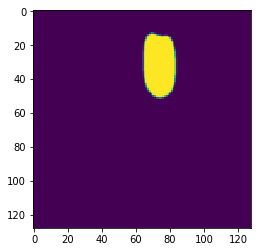

In [119]:
plt.imshow(y_valid[0].squeeze())

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


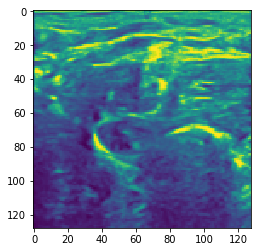

In [126]:
img_name = '1000.tif'
img = tf.keras.preprocessing.image.load_img('/content/test/'+img_name , grayscale=True)
in_img = tf.keras.preprocessing.image.img_to_array(img)
in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
test = in_img / 255.0
plt.imshow(test.squeeze())

In [0]:
prediction = model.predict(np.expand_dims(test , 0))

In [128]:
prediction.shape

(1, 128, 128, 1)

In [129]:
prediction.squeeze().shape

(128, 128)

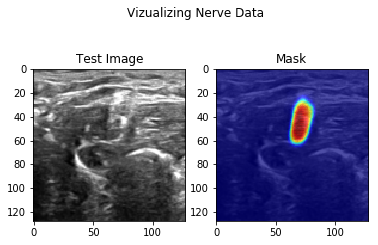

In [131]:
fig , ax = plt.subplots(1 , 2)
fig.suptitle('Vizualizing Nerve Data')
ax[0].set_title('Test Image')
ax[1].set_title('Mask')
img1 = test.squeeze()
ax[0].imshow(img1 , cmap = 'gray')

img2 = prediction.squeeze()
img2 = np.ma.masked_where(img2 == 0, img2)
ax[1].imshow(img1 , cmap = 'gray' , interpolation = 'none')
ax[1].imshow(img2 , cmap = 'jet', interpolation = 'none', alpha = 0.7)

plt.show()